In [80]:
import cv2
import sklearn
import sys
sys.executable
import glob
from scipy import ndimage, misc ,spatial 
import circle_fit as cf

img_list = []

for img in glob.glob("CCD-1/*.jpg"):
    img_list.append(cv2.imread(img,0))

In [81]:
def distance(v1, v2):
    #print(v1," ",v2)
    return np.sqrt(np.sum((v1 - v2) ** 2))  
def slope(v1, v2):
    #print(v1," ",v2)
    #print((v1[1]-v2[1]),end = ' ')
    #print(v2)
    return (v1[1]-v2[1])/(v2[0]-v1[0])

./Stop1_1000/105.jpg
1104.6226446515514 1088.0303634283794 758.4747028887085
1104.3078921956258 1090.2275929224218 644.3179534760708
Area:  1301717.5
(4309, 1, 2)
0
1


True

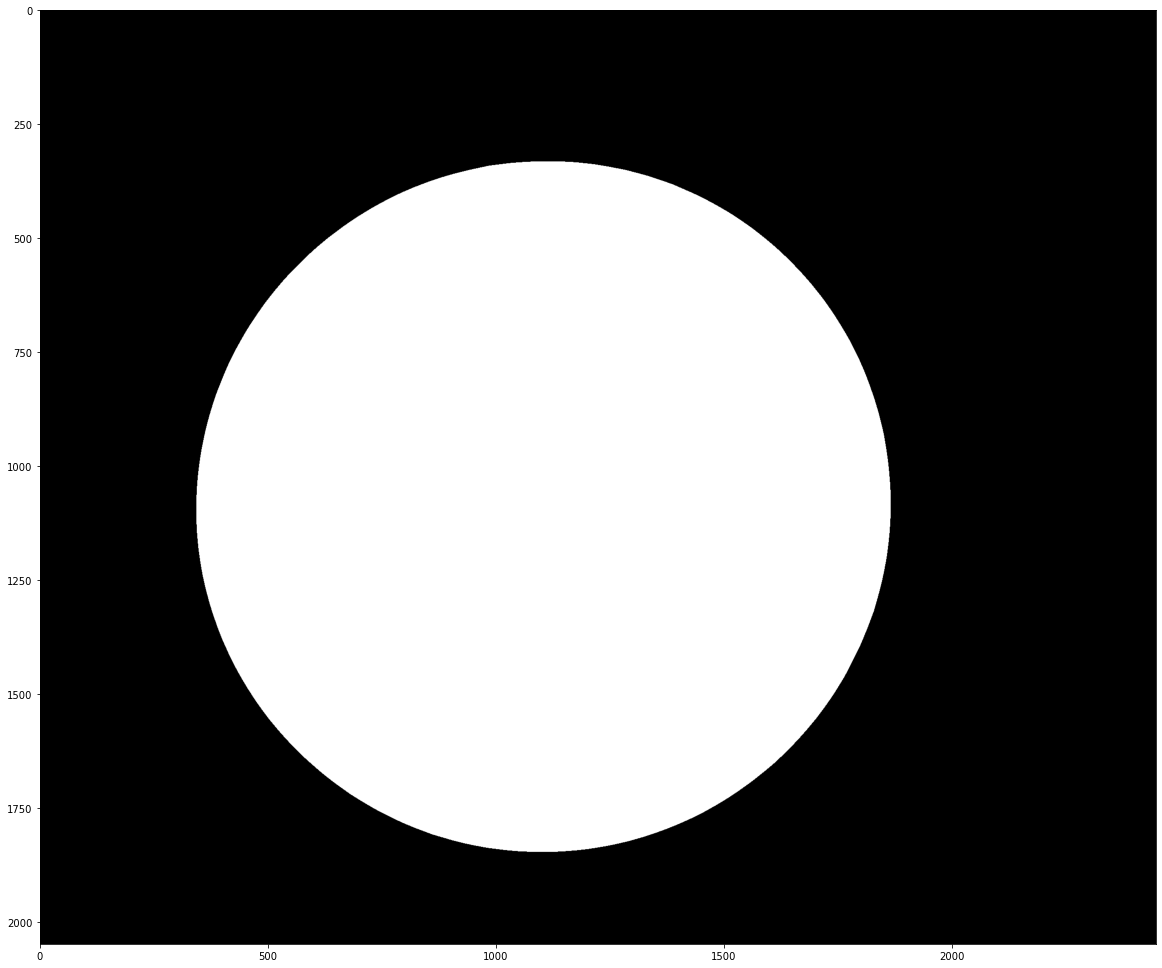

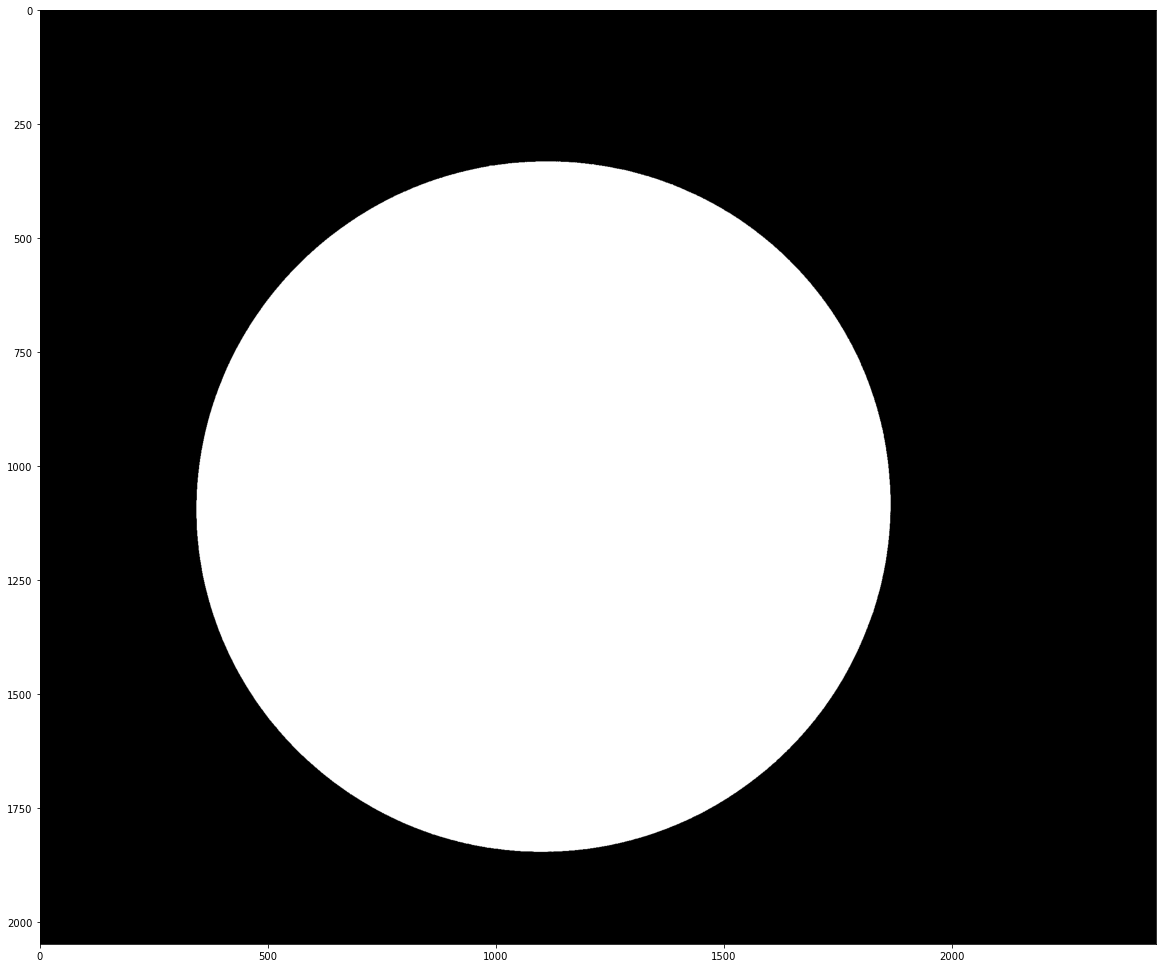

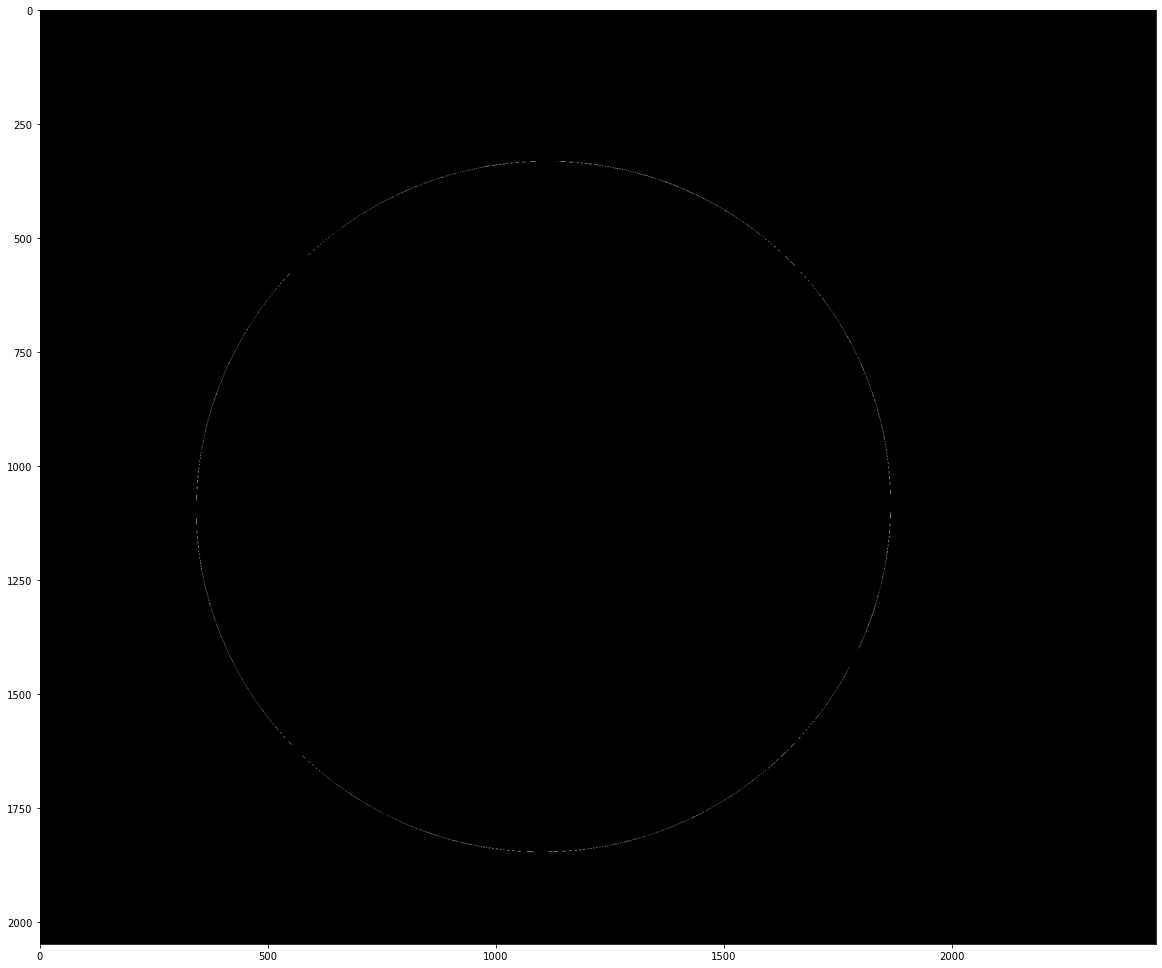

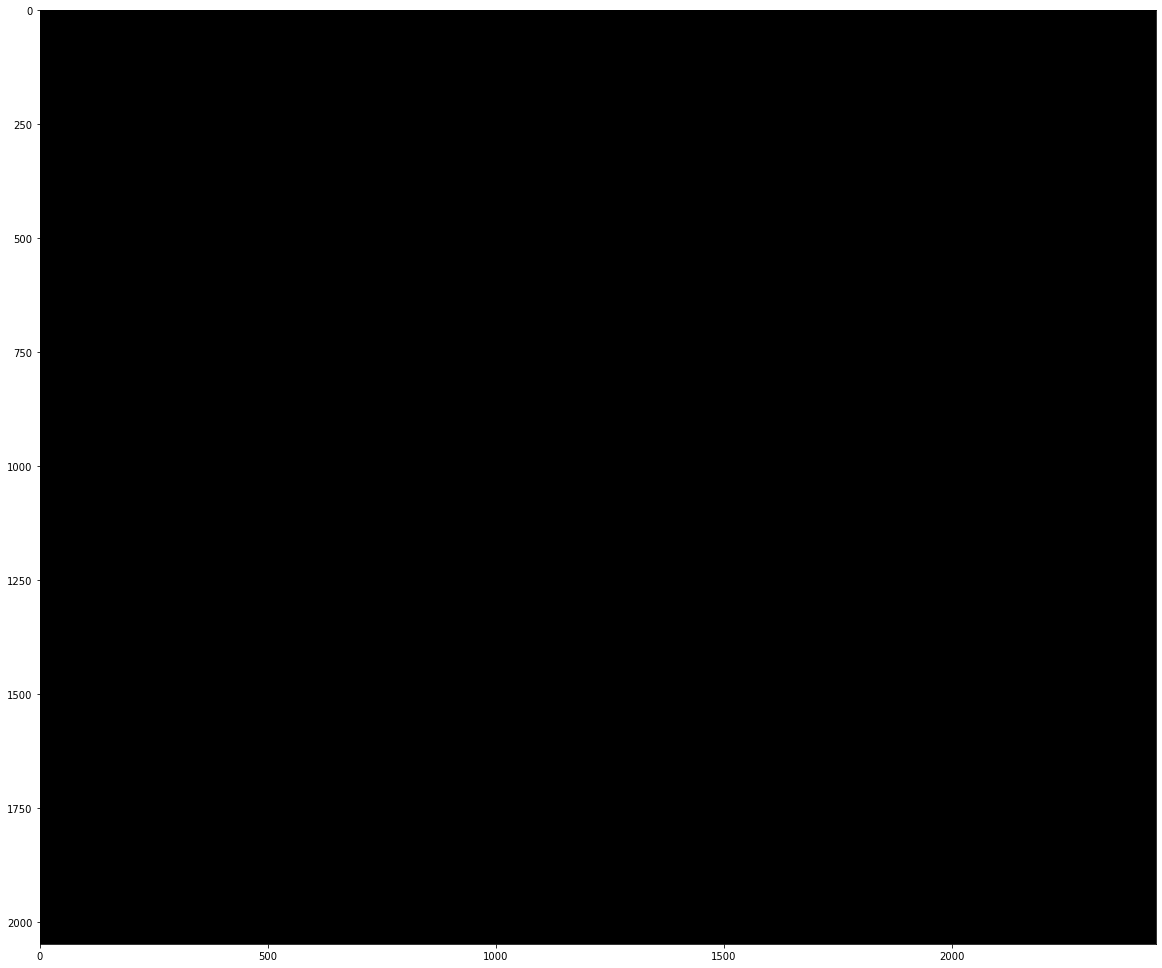

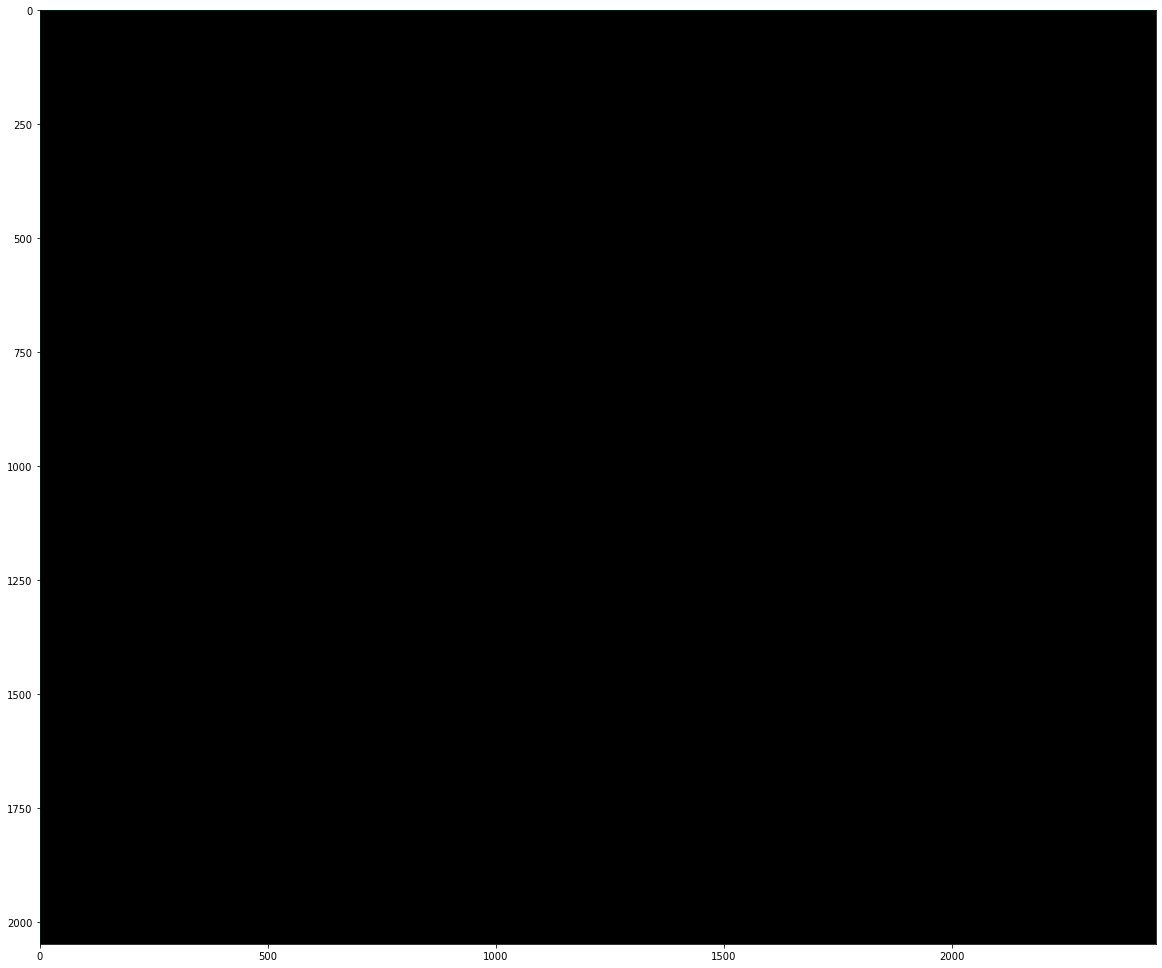

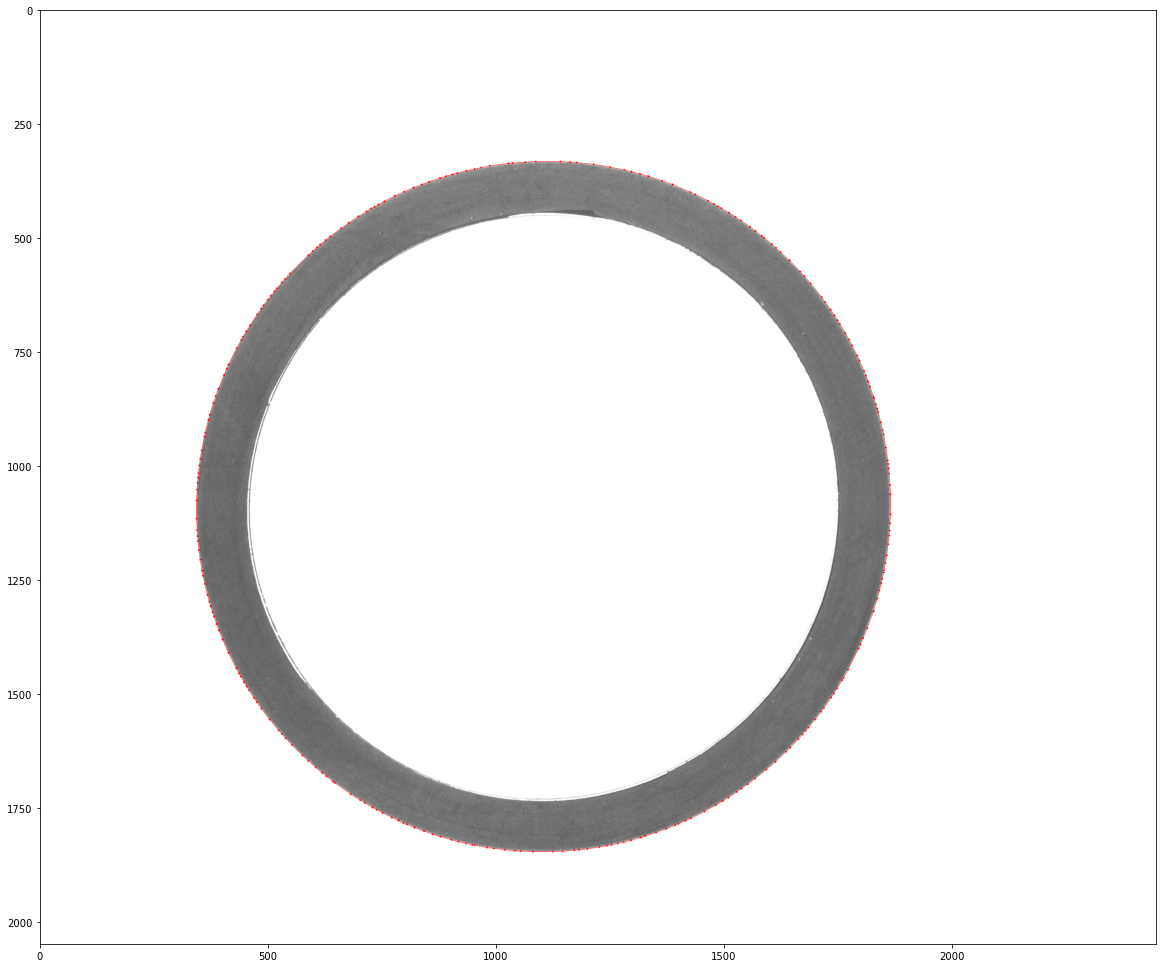

In [279]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#replace========================
#filename = './CCD-1/NG (29).jpg'
filename = './Stop1_1000/105.jpg'
print(filename)
img_list[8] = np.array(cv2.imread(filename,0))
#print(img_list[8])
#========================
                       
gray = img_list[8]

ret, thresh1 = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)
#print(gray)

#print(thresh1)


_ , contours, hierarchy = cv2.findContours(thresh1,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

backtorgb = cv2.cvtColor(gray,cv2.COLOR_GRAY2RGB)


'''
for i in range(np.array(contours).shape[0]):
        if(np.array(contours[i]).shape[0]>1500):
            print(np.array(contours[i]).shape)
'''

import circle_fit as cf

circle_point = []
contours_final = []
for i in range(np.array(contours).shape[0]):
        if(np.array(contours[i]).shape[0]>1500 and cv2.contourArea(contours[i])<5000000):
            

            cor = np.array(contours[i])
            cor = cor.reshape(cor.shape[0],cor.shape[2])
            #print(cor.shape)

            xc,yc,r,_ = cf.least_squares_circle(cor)
            print(xc,yc,r)
            circle_point.append([xc,yc,r])
            contours_final.append(contours[i])
            #===========
            #cv2.circle(backtorgb,(1115, 1081), 640, (255, 0, 0), -1)
            #cv2.circle(backtorgb,(xc.astype(int), yc.astype(int)), r.astype(int), (255, 0, 0), 2)
            #=============
            

#for i in range(np.array(contours).shape[0]):
#    if(np.array(contours[i]).shape[0]>1500 and cv2.contourArea(contours[i])<5000000):

#cv2.drawContours(backtorgb,contours_final[0],-1,(0,0,255),3)
print("Area: ",cv2.contourArea(contours_final[1]))
epsilon = 0.5# * cv2.arcLength(contours[i],True)
approx = cv2.approxPolyDP(contours_final[0], epsilon, True)
#corner_map = np.zeros_like(gray)
#cv2.polylines(corner_map, [approx], True, (255, 255, 255), 2)
#print(approx.shape)
#================================================
hull = cv2.convexHull(contours_final[0])
cv2.drawContours(backtorgb, hull,-1,(255,0,0),3)
for i in range(len(hull)):
    cv2.line(backtorgb, tuple(hull[i][0]), tuple(hull[(i+1)%len(hull)][0]), (255,0,0), 1)

convex_img = gray.copy()
cv2.drawContours(convex_img, [hull],-1,(0,0,0),-1)
convex_img = np.invert(convex_img)
plt.figure(figsize=(20,20))
plt.imshow(convex_img,cmap = 'gray')
#=================================================
#================================================
contour_img = gray.copy()
cv2.drawContours(contour_img, [contours_final[0]],-1,(0,0,0),-1)
print(contours_final[0].shape)
contour_img = np.invert(contour_img)
plt.figure(figsize=(20,20))
plt.imshow(contour_img,cmap = 'gray')
#=================================================
diff_img = convex_img - contour_img
plt.figure(figsize=(20,20))
plt.imshow(diff_img,cmap = 'gray')
#=================================================
kernel = np.ones((3,2),np.uint8)
opening = cv2.morphologyEx(diff_img, cv2.MORPH_OPEN, kernel)

plt.figure(figsize=(20,20))
plt.imshow(opening,cmap = 'gray')
#=================================================
nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(opening)


closing_backtorgb = cv2.cvtColor(opening,cv2.COLOR_GRAY2RGB)

for i in range(len(stats)):
    cv2.rectangle(closing_backtorgb, (stats[i][0], stats[i][1]), (stats[i][0]+stats[i][2], stats[i][1]+stats[i][3]), (0, 255,255 ), 1)
        
plt.figure(figsize=(20,20))
plt.imshow(closing_backtorgb)
#=================================================

cor = np.array(contours[1])
cor = cor.reshape(cor.shape[0],cor.shape[2])
#print(cor.shape)

xc,yc,r,_ = cf.least_squares_circle(cor)
#print(xc,yc,r)

for i in range(len(circle_point)):
    print(i)
    #cv2.circle(backtorgb,(circle_point[i][0].astype(int), circle_point[i][1].astype(int)), circle_point[i][2].astype(int), (255, 0, 0), 2)
    
#=============

plt.figure(figsize=(20,20))
plt.imshow(backtorgb)
cv2.imwrite('contour.jpg',backtorgb)


In [280]:
def mask_innercicle(img):
    
    ret, thresh1 = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY)
    _ , contours, hierarchy = cv2.findContours(thresh1,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

    import circle_fit as cf

    circle_point = []
    contours_final = []
    for i in range(np.array(contours).shape[0]):
            if(np.array(contours[i]).shape[0]>1500 and cv2.contourArea(contours[i])<5000000):
                contours_final.append(contours[i])
                #print(np.array(contours[i]).shape)

                cor = np.array(contours[i])
                cor = cor.reshape(cor.shape[0],cor.shape[2])
                #print(cor.shape)

                xc,yc,r,_ = cf.least_squares_circle(cor)
                print(xc,yc,r)
                circle_point.append([xc,yc,r])

    cor = np.array(contours[1])
    cor = cor.reshape(cor.shape[0],cor.shape[2])

    xc,yc,r,_ = cf.least_squares_circle(cor)

    h = img.shape[0]
    w = img.shape[1]
    center = (circle_point[1][0].astype(int), circle_point[1][1].astype(int))
    radius = circle_point[1][2].astype(int)
    mask = create_circular_mask(h, w, center=center, radius=radius)
    
    mask_array = np.ma.masked_array(img, mask=mask,fill_value = 255)
    img_temp = mask_array.filled()
    return img_temp

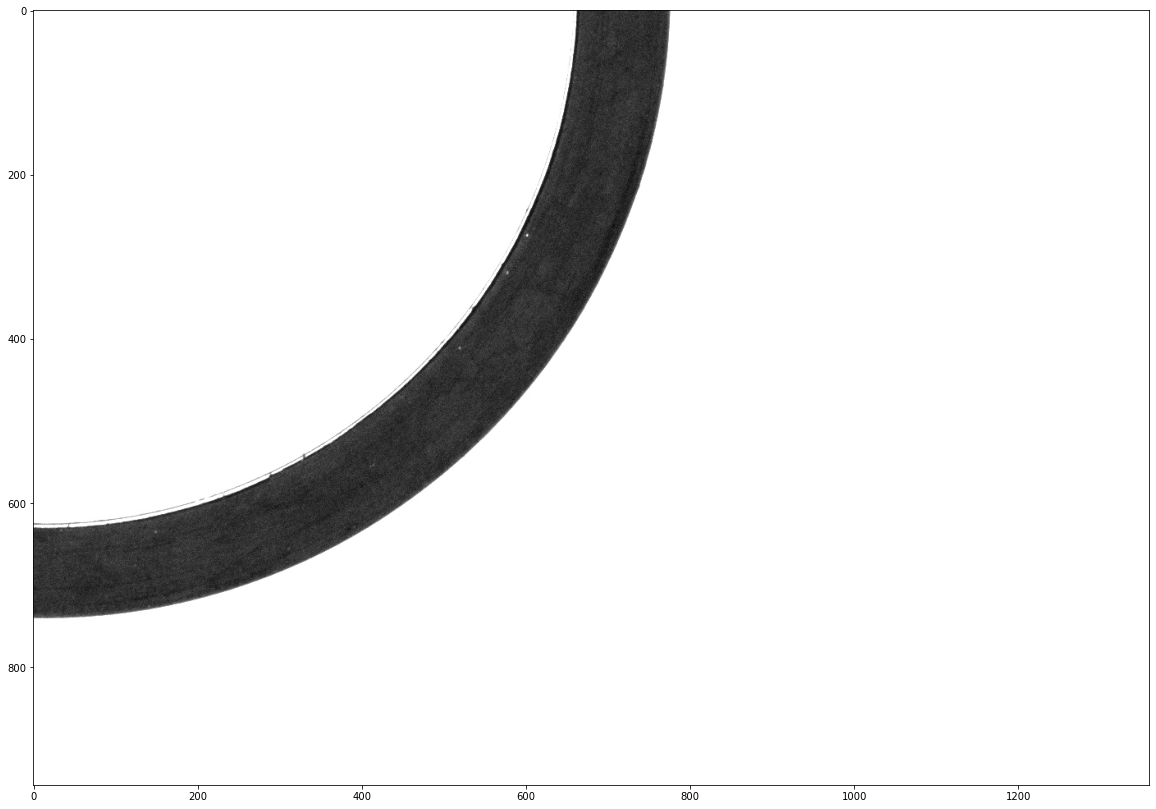

In [299]:
img_temp = img_list[8][int(xc):,int(yc):]
def create_circular_mask(h, w, center=None, radius=None):

    if center is None: # use the middle of the image
        center = (int(w/2), int(h/2))
    if radius is None: # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w-center[0], h-center[1])

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)
    #circle size
    mask = dist_from_center < (radius+10)
    return mask

h = img_temp.shape[0]
w = img_temp.shape[1]
center = (circle_point[i][0].astype(int), circle_point[i][1].astype(int))
radius = circle_point[i][2].astype(int)
mask = create_circular_mask(h, w, center=center, radius=radius)
plt.figure(figsize=(20,20))
plt.imshow(img_temp,cmap = 'gray')

In [300]:
mask_array = np.ma.masked_array(img_temp, mask=mask,fill_value = 255)
img_temp = mask_array.filled()

1104.677911350554 1087.984714522677 758.4333539125442
1104.6288894641625 1090.267074739925 644.196986314917
(2, 8, 1, 2)
mean:  119.13179636311186
106.46530612244898
Sum:  379 140 86   110.49662162162163
106.42605633802818
Sum:  401 140 86   111.82704402515724


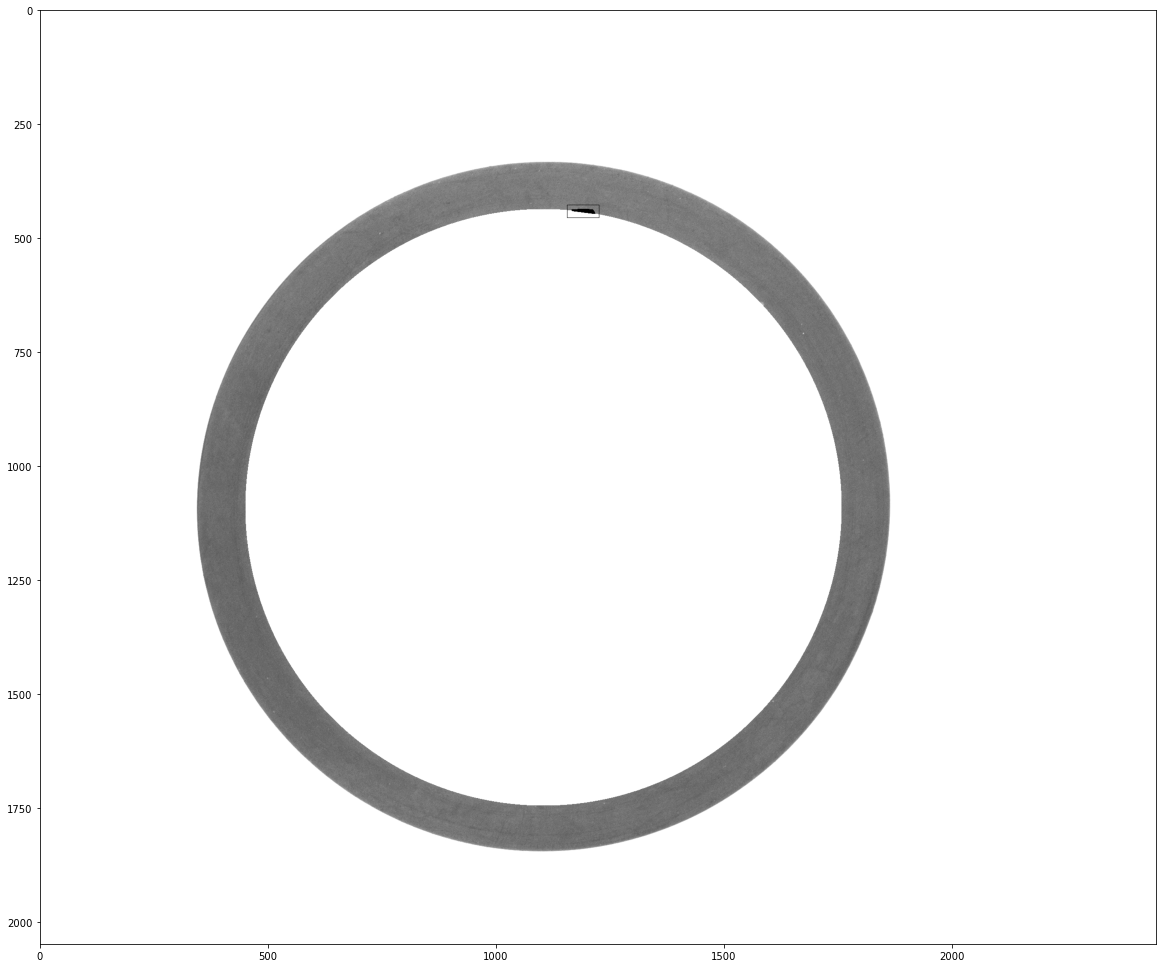

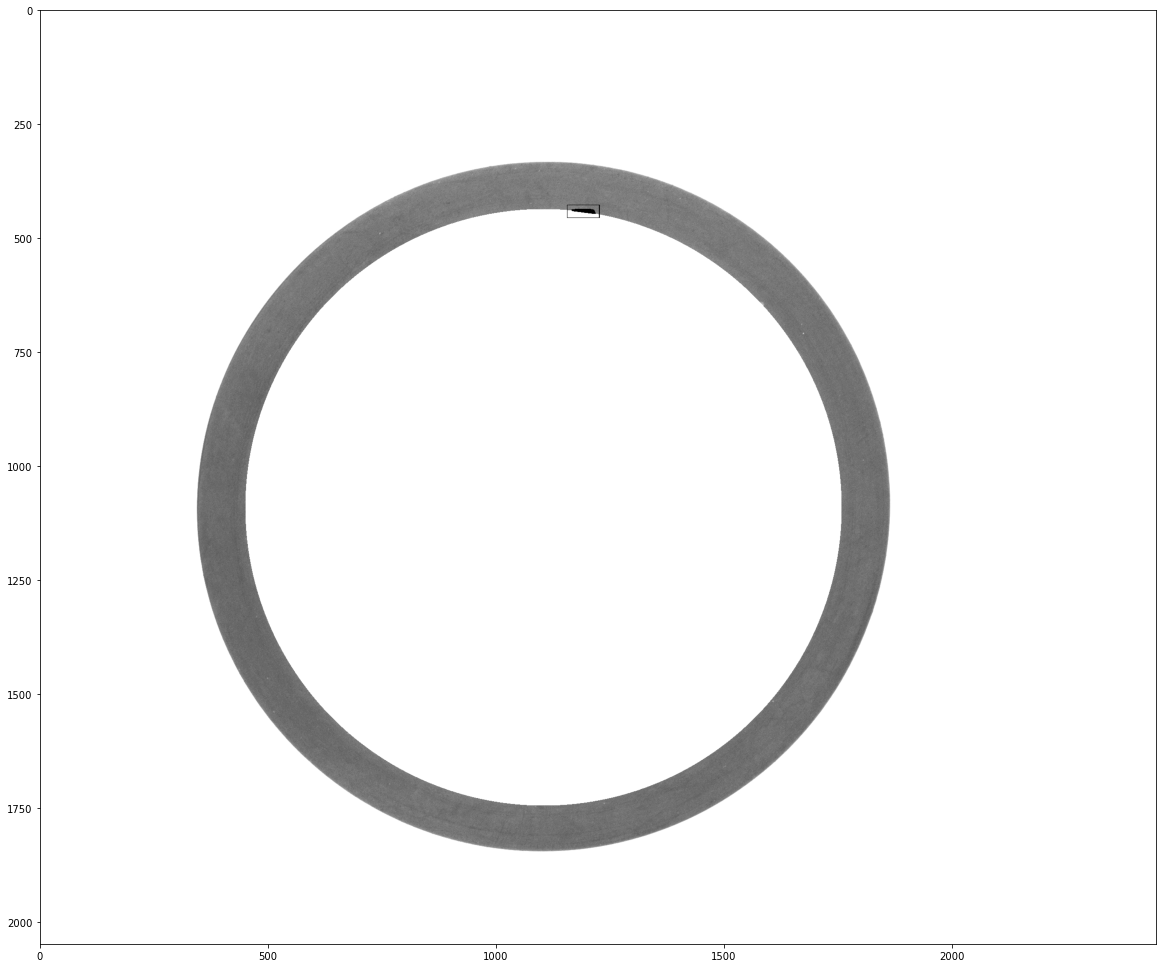

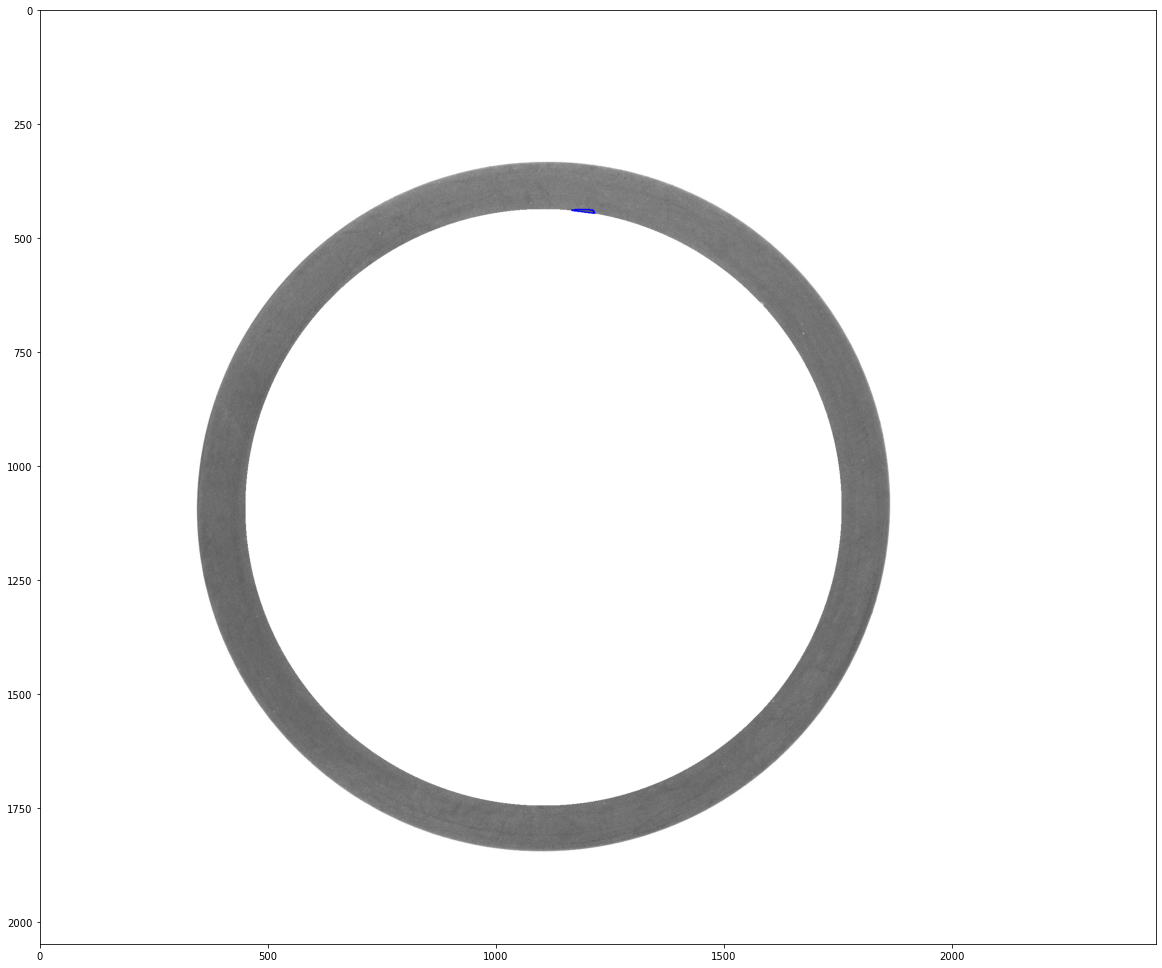

In [304]:
img_temp = img_list[8]


img_temp.shape
img_temp = mask_innercicle(img_temp)
#plt.figure(figsize=(20,20))
#plt.imshow(img_temp,cmap = 'gray')

#cv2.imwrite('1.jpg',img_temp)
#img_temp = cv2.blur(img_temp,(5,5))

#plt.figure(figsize=(20,20))
#plt.imshow(img_temp,cmap = 'gray')

#img_temp = cv2.blur(img_temp,(3,3))

#plt.figure(figsize=(20,20))
#plt.imshow(img_temp,cmap = 'gray')
#img_temp = ndimage.minimum_filter(img_temp, size=5)
#plt.figure(figsize=(20,20))
#plt.imshow(img_temp,cmap = 'gray')
#plt.figure(figsize=(20,20))
#plt.imshow(img_temp,cmap = 'gray')

#img_temp = cv2.blur(img_temp,(3,3))

#clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(20,20))#cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

#clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(5,5))
#clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(3,3))

#img_temp = clahe.apply(img_temp)

#img_temp = cv2.blur(img_temp,(3,3))


#img_temp = img_temp - blur
vis = img_temp.copy()
#mser = cv2.MSER_create(_delta=5, _min_area=150,_max_variation=0.7)

#mser = cv2.MSER_create(_delta=5, _min_area=250,_max_variation=0.5)


mser = cv2.MSER_create(_delta=5, _min_area=120, _max_area = 800, _max_variation=1.3)
#mser = cv2.MSER_create(_delta=5, _min_area=800,_max_variation=1.5)
#mser = cv2.MSER_create(_delta=5, _min_area=800,_max_variation=0.9)
#mser = cv2.MSER_create(_delta=5, _min_area=800,_max_variation=0.5)
#cv2.MSER_create(_delta=3, _min_area=100,_max_variation=0.3)
#mser = cv2.MSER_create(_delta=3, _min_area=100,_max_variation=0.5)
regions = mser.detectRegions(img_temp)

vis_rgb = cv2.cvtColor(vis,cv2.COLOR_GRAY2RGB)
hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions[0]]

print(np.array(hulls).shape)
mean = np.mean(vis[vis<255])
print("mean: ",mean)
for j in range(np.array(hulls).shape[0]):
    mask_now = np.zeros_like(vis)
    mask_now = cv2.fillPoly(mask_now, [hulls[j]],1)
    #kernel = np.ones((10,10),np.uint8)
    mask_now = cv2.dilate(mask_now,kernel,iterations = 1)
    mask_now = vis*mask_now
    #=====================================================
    minx, miny = np.array(hulls[j]).min(0).ravel()
    maxx, maxy = np.array(hulls[j]).max(0).ravel()
    #print(minx," ",miny," ",maxx," ",maxy)
    cv2.rectangle(vis, (minx-10,miny-10), (maxx+10, maxy+10), (0, 255,255 ), 1)
    plt.figure(figsize=(20,20))
    plt.imshow(vis*np.invert(mask_now>0) , cmap = 'gray')
    roi = (vis*np.invert(mask_now>0))[minx-10:maxx+10,miny-10:maxy+10]
    #roi
    print(np.mean(roi[(roi>0)]))#&(roi<255)]))
    #==============================================
    min_in_poly = np.min(mask_now[mask_now>0])
    mean_in_poly = np.mean(mask_now[(mask_now>0)&(mask_now<255)])
    print("Sum: ",np.count_nonzero(mask_now>0),np.count_nonzero((mask_now<mean) & (mask_now>0)),end = " ")
    print(min_in_poly," ", mean_in_poly)
    if(min_in_poly>100 or mean_in_poly>130):
        continue

    cv2.polylines(vis_rgb, [hulls[j]], 1, (0, 0, 255),2)
    
#print(np.array(hulls[0]))


#cv2.polylines(vis_rgb, hulls, 1, (255, 0, 0))

plt.figure(figsize=(20,20))
plt.imshow(vis_rgb,cmap = 'gray')


In [298]:
96   122.54545454545455
102   130.6060606060606

SyntaxError: invalid syntax (<ipython-input-298-8687d8ffb66f>, line 1)

### TODO

可供使用者調整 
1. bounding box 長寬
2. 周長
3. 面積